<a href="https://colab.research.google.com/github/jalvarezz13/machine_learning_esi_2122/blob/master/Task3%20-%20Supervised%20Learning/notebooks/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.LOAD THE DATA

Upload the data from GitHub

In [ ]:
!wget https://raw.githubusercontent.com/jalvarezz13/machine_learning_esi_2122/master/Task3%20-%20Supervised%20Learning/data/train.csv

--2022-01-22 17:41:30--  https://raw.githubusercontent.com/jalvarezz13/machine_learning_esi_2122/master/Task3%20-%20Supervised%20Learning/data/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4942050 (4.7M) [text/plain]
Saving to: ‘train.csv.2’

train.csv.2         100%[===================>]   4.71M  --.-KB/s    in 0.08s   

2022-01-22 17:41:30 (61.6 MB/s) - ‘train.csv.2’ saved [4942050/4942050]



### 1.1 Transform data into a pandas dataframe

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


The training set containing 30,000 insurance policies that you can use to train your model.

Data fields

*   **ClaimNumber**: Unique policy identifier
*   **DateTimeOfAccident**: Date and time of accident
*   **DateReported**: Date that accident was reported
*   **Age**: Age of worker
*   **Gender**: Gender of worker
*   **MaritalStatus**: Martial status of worker. (M)arried, (S)ingle, (U)unknown.
*   **DependentChildren**: The number of dependent children
*   **DependentsOther**: The number of dependants excluding children
*   **WeeklyWages**: Total weekly wage
*   **PartTimeFullTime**: Binary (P) or (F)
*   **HoursWorkedPerWeek**: Total hours worked per week
*   **DaysWorkedPerWeek**: Number of days worked per week
*   **ClaimDescription**: Free text description of the claim
*   **InitialIncurredClaimCost**: Initial estimate by the insurer of the claim cost
*   **UltimateIncurredClaimCost**: Total claims payments by the insurance company. *   This is the field you are asked to predict in the test set.

In [ ]:
df.columns

Index(['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'Age', 'Gender',
       'MaritalStatus', 'DependentChildren', 'DependentsOther', 'WeeklyWages',
       'PartTimeFullTime', 'HoursWorkedPerWeek', 'DaysWorkedPerWeek',
       'ClaimDescription', 'InitialIncurredCalimsCost',
       'UltimateIncurredClaimCost'],
      dtype='object')

In [ ]:
df.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925


## 2.PREPROCESSING

### 2.1 Missing Values

In [ ]:
df.shape

(36176, 15)

In [ ]:
pd.isnull(df).any()

ClaimNumber                  False
DateTimeOfAccident           False
DateReported                 False
Age                          False
Gender                       False
MaritalStatus                 True
DependentChildren            False
DependentsOther              False
WeeklyWages                   True
PartTimeFullTime             False
HoursWorkedPerWeek            True
DaysWorkedPerWeek            False
ClaimDescription             False
InitialIncurredCalimsCost    False
UltimateIncurredClaimCost    False
dtype: bool

In [ ]:
df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
df.shape

(36049, 15)

### 2.2 One Hot Encoding

The strategy implemented by One Hot Encoding is to create a column for each different value that exists in the feature we are encoding and, for each record, mark the column to which that record belongs with a 1 and leave the others with 0.

In [ ]:
df_OneHot = pd.get_dummies(df[['Gender','MaritalStatus', 'PartTimeFullTime']])
df_OneHot

,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,0,1,0,1,0,0,1,0
1,1,0,0,1,0,0,1,0
2,0,1,0,0,0,1,1,0
3,0,1,0,0,1,0,1,0
4,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...
36171,1,0,0,0,1,0,1,0
36172,0,1,0,1,0,0,1,0
36173,1,0,0,1,0,0,0,1
36174,0,1,0,1,0,0,1,0


At the begining only the numerical and the encoded features must be considered.

In [ ]:
df_full = pd.concat([df, df_OneHot], axis = 1)
df_full.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,Gender,MaritalStatus,DependentChildren,DependentsOther,WeeklyWages,PartTimeFullTime,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,M,M,0,0,500.00,F,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,0,1,0,1,0,0,1,0
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,F,M,0,0,509.34,F,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1,0,0,1,0,0,1,0
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,M,U,0,0,709.10,F,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,0,1,0,0,0,1,1,0
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,M,S,0,0,555.46,F,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,0,1,0,0,1,0,1,0
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,M,M,0,0,377.10,F,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,0,1,0,1,0,0,1,0


# 3.BASELINE

### 3.1 Feature Selection

In [ ]:
df_not_redundant = df_full.drop(labels=['Gender', 'MaritalStatus', 'PartTimeFullTime'], axis=1)
df_not_redundant.head()

,ClaimNumber,DateTimeOfAccident,DateReported,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,ClaimDescription,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,WC8205482,2002-04-09T07:00:00Z,2002-07-05T00:00:00Z,48,0,0,500.00,38.0,5,LIFTING TYRE INJURY TO RIGHT ARM AND WRIST INJURY,1500,4748.203388,0,1,0,1,0,0,1,0
1,WC6922469,1999-01-07T11:00:00Z,1999-01-20T00:00:00Z,43,0,0,509.34,37.5,5,STEPPED AROUND CRATES AND TRUCK TRAY FRACTURE ...,5500,6326.285819,1,0,0,1,0,0,1,0
2,WC5442654,1996-03-25T00:00:00Z,1996-04-14T00:00:00Z,30,0,0,709.10,38.0,5,CUT ON SHARP EDGE CUT LEFT THUMB,1700,2293.949087,0,1,0,0,0,1,1,0
3,WC9796897,2005-06-22T13:00:00Z,2005-07-22T00:00:00Z,41,0,0,555.46,38.0,5,DIGGING LOWER BACK LOWER BACK STRAIN,15000,17786.487170,0,1,0,0,1,0,1,0
4,WC2603726,1990-08-29T08:00:00Z,1990-09-27T00:00:00Z,36,0,0,377.10,38.0,5,REACHING ABOVE SHOULDER LEVEL ACUTE MUSCLE STR...,2800,4014.002925,0,1,0,1,0,0,1,0


In [ ]:
df_numeric_selection = df_not_redundant.drop(labels=['ClaimNumber', 'DateTimeOfAccident', 'DateReported', 'ClaimDescription'], axis=1)
df_numeric_selection.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,48,0,0,500.00,38.0,5,1500,4748.203388,0,1,0,1,0,0,1,0
1,43,0,0,509.34,37.5,5,5500,6326.285819,1,0,0,1,0,0,1,0
2,30,0,0,709.10,38.0,5,1700,2293.949087,0,1,0,0,0,1,1,0
3,41,0,0,555.46,38.0,5,15000,17786.487170,0,1,0,0,1,0,1,0
4,36,0,0,377.10,38.0,5,2800,4014.002925,0,1,0,1,0,0,1,0


### 3.2 Train and Test split

In [ ]:
from sklearn.model_selection import train_test_split
features_list = list(df_numeric_selection.columns)
features_list.remove('UltimateIncurredClaimCost')

X = df_numeric_selection[features_list]
y = df_numeric_selection['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
654,20,0,0,126.00,38.0,5,800,0,1,0,1,0,0,1,0
8573,28,0,0,500.00,38.0,5,9500,0,1,0,1,0,0,1,0
31356,25,0,0,291.50,38.0,5,2000,0,1,0,0,1,0,1,0
15546,44,0,0,523.74,40.0,5,601,0,1,0,0,1,0,1,0
12344,49,0,0,544.77,40.0,5,5500,0,1,0,1,0,0,1,0


### 3.3 KNN

#### 3.3.1 Setting Parameters

In [ ]:
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,20,0,0,126.00,38.0,5,800,0,1,0,1,0,0,1,0
1,28,0,0,500.00,38.0,5,9500,0,1,0,1,0,0,1,0
2,25,0,0,291.50,38.0,5,2000,0,1,0,0,1,0,1,0
3,44,0,0,523.74,40.0,5,601,0,1,0,0,1,0,1,0
4,49,0,0,544.77,40.0,5,5500,0,1,0,1,0,0,1,0


CROSS - VALIDATION: The data are split into train and test sets several consecutive times and the averaged value of the prediction scores obtained with the different sets is the estimation of the error

Metric = euclidean

Min Value uniform : 8031.939033761073 (29)
Min Value distance : 8173.019297945078 (29)


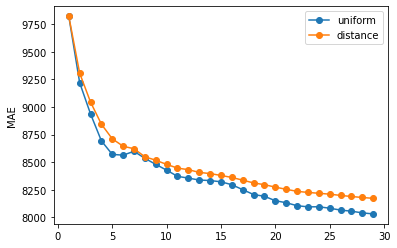

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np

cv = KFold(n_splits = 10, shuffle = False)

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights, metric='euclidean')
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          knn.fit( X = fx_train, y = fy_train)
          y_pred = knn.predict(X = fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

#### 3.3.2 Prediction

In [ ]:
# constructor
n_neighbors = 24
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights)

# fit and predict
knn.fit( X = X_train, y = y_train)
y_pred = knn.predict(X = X_test)


from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 7404.008356131998
MAPE: 0.8814212795553249
MSE: 463051675.183564
R^2: -0.5772671784943437


#### 3.3.3 Prediction visualization

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


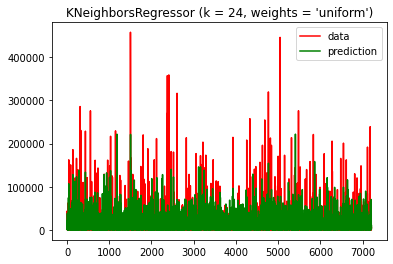

In [ ]:
from sklearn.metrics import mean_absolute_error

                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.show()

## 3.4 Decision Trees

### 3.4.1 Binary Tree

Min Value uniform : 7851.617174005655 (3)


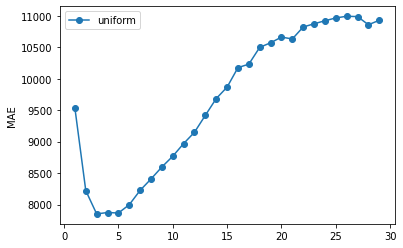

In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
import numpy as np
from sklearn import tree

cv = KFold(n_splits = 10, shuffle = False)

total_scores = []
for i in range(1,30):
    fold_accuracy = []
    dt = tree.DecisionTreeRegressor(max_depth=i)
    for train_fold, test_fold in cv.split(X_train):
      # División train test aleatoria
      # train
      fx_train = X_train.iloc[train_fold]
      fy_train = y_train.iloc[train_fold]
      # test
      fx_test = X_train.iloc[test_fold]
      fy_test = y_train.iloc[test_fold]

      # entrenamiento y ejecución del modelo
      dt.fit( X = fx_train, y = fy_train)
      y_pred = dt.predict(X = fx_test)
      # evaluación del modelo
      mae = mean_absolute_error(fy_test, y_pred)
      fold_accuracy.append(mae)
    total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

plt.plot(range(1,len(total_scores)+1), total_scores, 
          marker='o', label=weights)
print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

### 3.4.2 Model Construction

In [ ]:
regressor = tree.DecisionTreeRegressor(criterion='mse', max_depth=3, random_state=0)
regressor.fit(X_train, y_train)

print ('Feature Relevances')
pd.DataFrame({'Attributes': features_list,
              'Decision Tree': regressor.feature_importances_})

Feature Relevances


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


,Attributes,Decision Tree
0,Age,0.000000
1,DependentChildren,0.022927
2,DependentsOther,0.000000
3,WeeklyWages,0.000000
4,HoursWorkedPerWeek,0.000000
5,DaysWorkedPerWeek,0.000000
6,InitialIncurredCalimsCost,0.977073
7,Gender_F,0.000000
8,Gender_M,0.000000
9,Gender_U,0.000000


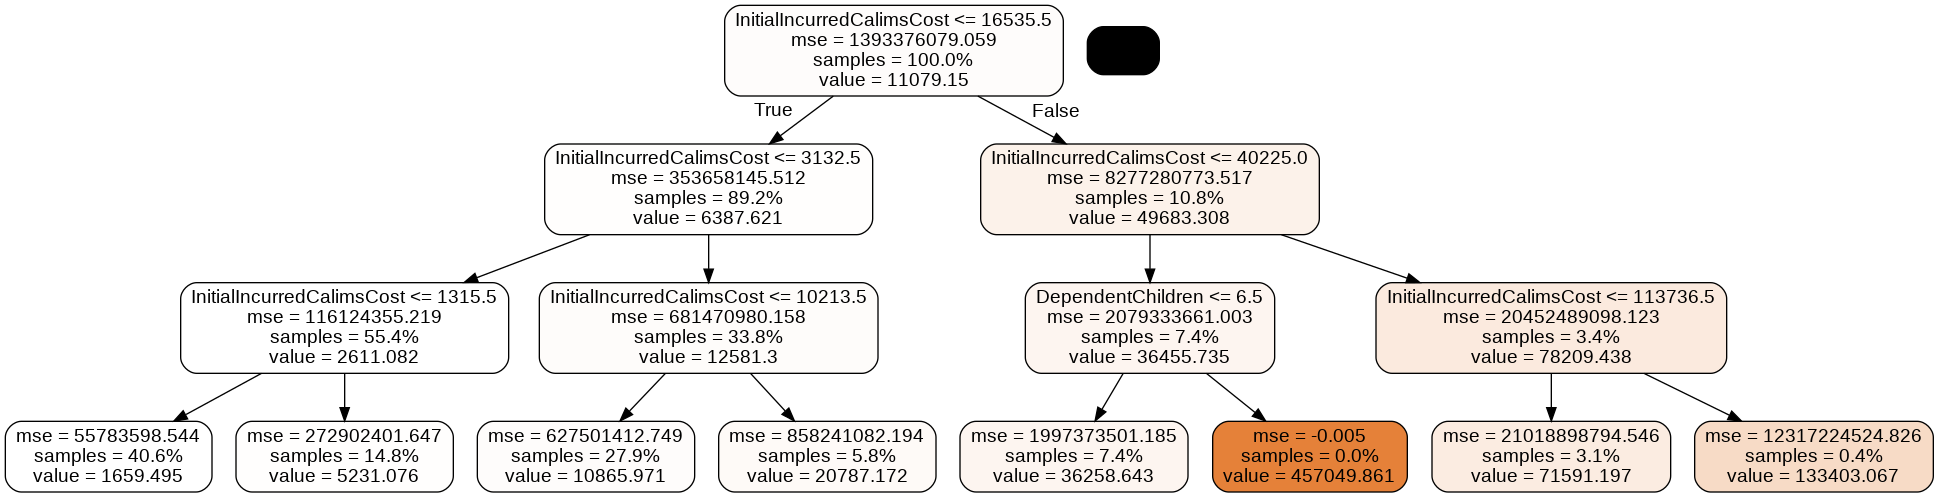

In [ ]:
from IPython.display import Image
from sklearn import tree
from io import StringIO

# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

dot_data = StringIO()
#tree.export_graphviz(clf, out_file=dot_data, feature_names=list(spy.drop(['CLASIFICADOR'], axis=1)))
tree.export_graphviz(regressor, out_file = dot_data, proportion = True, feature_names=features_list, rounded = True, filled = True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

### 3.4.3 Prediction

In [ ]:
y_pred = dt.predict(X_test)


from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 9769.402037785574
MAPE: 1.1930000900796487
MSE: 1004462852.1608009
R^2: -0.22763511486098964


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


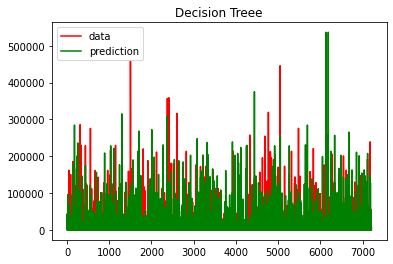

In [ ]:
from sklearn.metrics import mean_absolute_error
                    
# x axis for plotting
import numpy as np
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
#plt.plot(xx, y, c='k', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("Decision Treee")

plt.show()

# 4.OPTIMIZED MODEL

### 4.1 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#1.1 Model Parametrization 
regressor = RandomForestRegressor(n_estimators= 4, max_depth = 2, criterion='absolute_error', random_state=0)
#1.2 Model construction
regressor.fit(X_train, y_train)

# Test
y_pred = regressor.predict(X_test)

# metrics calculation 
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print ("Error Measure ",  mae)

Error Measure  5915.318501652456


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


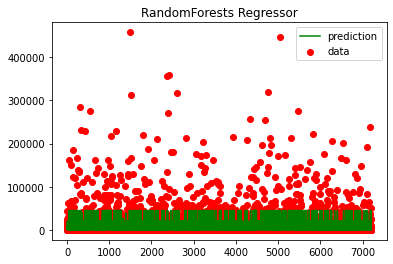

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xx = np.stack(i for i in range(len(y_test)))
plt.scatter(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests Regressor")

plt.show()

In [ ]:
# FEATURE RELEVANCIES
print ('Feature Relevancies')
pd.DataFrame({'Attributes': features_list ,
              'Decision Tree': regressor.feature_importances_})

Feature Relevancies


,Attributes,Decision Tree
0,Age,0.0
1,DependentChildren,0.0
2,DependentsOther,0.0
3,WeeklyWages,0.0
4,HoursWorkedPerWeek,0.0
5,DaysWorkedPerWeek,0.0
6,InitialIncurredCalimsCost,1.0
7,Gender_F,0.0
8,Gender_M,0.0
9,Gender_U,0.0


In [ ]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 5915.318501652456
MAPE: 1.3803510745618623
MSE: 503701719.37342286
R^2: -4.315977401509709


### 4.2 Boosting

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Fit regression model
regressors = []
regressors.append(DecisionTreeRegressor(max_depth=4, criterion='absolute_error'))

regressors.append(AdaBoostRegressor(DecisionTreeRegressor(max_depth=4, criterion='absolute_error'),
                          n_estimators=100, random_state=42))
                      
regressors.append(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                                   max_depth=4, random_state=0, loss='ls'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


Error Measure 5435.072699336033


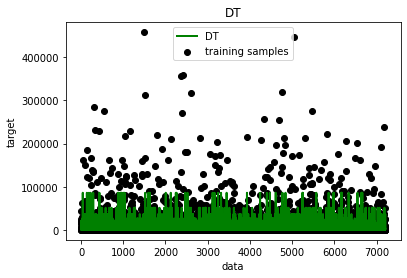

Error Measure 15373.800241201194


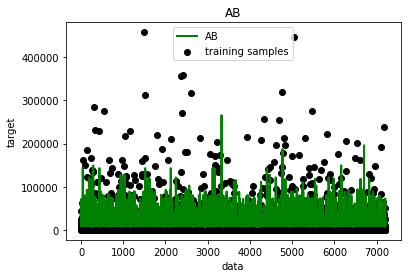

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:290: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  FutureWarning,


Error Measure 7094.012832568501


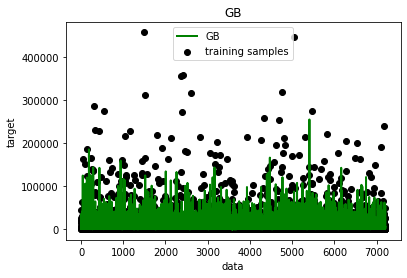

In [ ]:
xx = np.stack(i for i in range(len(y_test)))
regr_names = ["DT", "AB", "GB"]
               
for i, r in enumerate(regressors):
    r.fit(X_train, y_train)
    y = r.predict(X_test)
    print ("Error Measure", mean_absolute_error(y_test,y))
    # Plot the results
    plt.figure()
    plt.scatter(xx, y_test, c="k", label="training samples")
    plt.plot(xx, y, c="g", label=regr_names[i], linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title(regr_names[i])
    plt.axis('tight')
    plt.legend()
    plt.show()

In [ ]:
print ('Feature Relevancies')
pd.DataFrame({'Attributes': features_list ,
              'Decision Tree':regressors[0].feature_importances_, 
              'AdaBoostRegressor': regressors[1].feature_importances_,
              'GradientBoostingRegressor': regressors[2].feature_importances_, })

Feature Relevancies


,Attributes,Decision Tree,AdaBoostRegressor,GradientBoostingRegressor
0,Age,0.000000,0.176397,0.051637
1,DependentChildren,0.000000,0.003578,0.019792
2,DependentsOther,0.000000,0.001743,0.001438
3,WeeklyWages,0.009232,0.244920,0.416724
4,HoursWorkedPerWeek,0.000000,0.110615,0.034292
5,DaysWorkedPerWeek,0.000000,0.001143,0.001178
6,InitialIncurredCalimsCost,0.990768,0.249173,0.472451
7,Gender_F,0.000000,0.128875,0.000207
8,Gender_M,0.000000,0.073591,0.000038
9,Gender_U,0.000000,0.000000,0.000000


### 4.3 Hyperparameter Optimization

In [ ]:
X = df_numeric_selection
y = df_numeric_selection['UltimateIncurredClaimCost']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.reset_index(drop = True, inplace = True)
X_train.head()

,Age,DependentChildren,DependentsOther,WeeklyWages,HoursWorkedPerWeek,DaysWorkedPerWeek,InitialIncurredCalimsCost,UltimateIncurredClaimCost,Gender_F,Gender_M,Gender_U,MaritalStatus_M,MaritalStatus_S,MaritalStatus_U,PartTimeFullTime_F,PartTimeFullTime_P
0,37,0,0,634.00,38.0,5,10000,4714.226217,0,1,0,0,1,0,1,0
1,26,0,0,422.70,24.2,5,3000,2889.589394,0,1,0,0,1,0,1,0
2,52,0,0,761.97,38.0,5,50000,31481.086950,0,1,0,1,0,0,1,0
3,33,0,0,200.00,38.0,5,650,624.300406,1,0,0,1,0,0,1,0
4,42,0,0,865.38,38.0,5,3250,4894.426787,0,1,0,1,0,0,1,0


In [ ]:
regressor = RandomForestRegressor(random_state=0)
param_dist = {"n_estimators": [8, 16, 24, 32], # Number of trees in random forest
              "max_depth": [6, 5, 4], # Maximum number of levels in tree
              "criterion": ["squared_error", "absolute_error"] #mse, mae
              }

rnd_regres = GridSearchCV(estimator = regressor, param_grid = param_dist, cv = 2, verbose=4)

# Fit the grid search model
rnd_regres.fit(X = X_train, y = y_train)
rnd_regres.best_params_

# choose the best
best_random = rnd_regres.best_estimator_

# fit
best_random.fit( X = X_train, y =y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=8;, score=0.998 total time=   0.2s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=8;, score=0.526 total time=   0.2s
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=16;, score=0.999 total time=   0.3s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=16;, score=0.518 total time=   0.4s
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=24;, score=0.999 total time=   0.5s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=24;, score=0.521 total time=   0.5s
[CV 1/2] END criterion=squared_error, max_depth=6, n_estimators=32;, score=0.999 total time=   0.7s
[CV 2/2] END criterion=squared_error, max_depth=6, n_estimators=32;, score=0.523 total time=   0.7s
[CV 1/2] END criterion=squared_error, max_depth=5, n_estimators=8;, score=0.997 total time=   0.1s
[CV 2/2] END criterion=squared_error, max_

RandomForestRegressor(max_depth=6, n_estimators=8, random_state=0)

####4.3.1 Prediction

In [ ]:
y_pred = best_random.predict(X = X_test)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


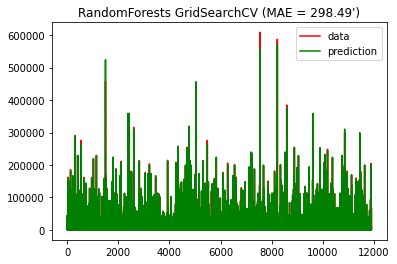

In [ ]:
# Visualization
xx = np.stack(i for i in range(y_test.shape[0]))
plt.plot(xx, y_test, c='r', label='data')
plt.plot(xx, y_pred, c='g', label='prediction')
plt.axis('tight')
plt.legend()
plt.title("RandomForests GridSearchCV (MAE = %6.2f')" % ( metrics.mean_absolute_error(y_pred , y_test)))

plt.show()

In [ ]:
# Errors
print ("MAE:", metrics.mean_absolute_error(y_test, y_pred))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_test, y_pred))
print ("MSE:", metrics.mean_squared_error(y_test, y_pred))
print ("R^2:", metrics.r2_score(y_test, y_pred))

MAE: 298.4868923240643
MAPE: 0.2039058437434235
MSE: 868204.0391195125
R^2: 0.9988003549718651


####Save the model

In [ ]:
import pickle
pickle_file = open('Optimized_model.pickle', 'wb')
pickle.dump(best_random, pickle_file)

In [ ]:
# pickle_file = open('Optimized_model.pickle', 'rb')
# model = pickle.load(pickle_file)